2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dataset loaded successfully!
2026-02-13 21:48:22,448 - ✅ Dat

✅ Converting 'schoolsup' to Real Boolean (1/0)...
✅ Converting 'famsup' to Real Boolean (1/0)...
✅ Converting 'paid' to Real Boolean (1/0)...
✅ Converting 'activities' to Real Boolean (1/0)...
✅ Converting 'nursery' to Real Boolean (1/0)...
✅ Converting 'higher' to Real Boolean (1/0)...
✅ Converting 'internet' to Real Boolean (1/0)...
✅ Converting 'romantic' to Real Boolean (1/0)...

--- 🏆 TOP 5 POSITIVE FACTORS (Boost Grade) ---
                   Final_Performance
Final_Performance           1.000000
G3                          1.000000
G2                          0.904868
Test_Avg_Score              0.889792
G1                          0.801468
Engagement_Level            0.744731

--- 📉 TOP 5 NEGATIVE FACTORS (Lower Grade) ---
            Final_Performance
romantic            -0.129970
goout               -0.132791
age                 -0.161579
failures            -0.360415
Error_Rate          -0.858284


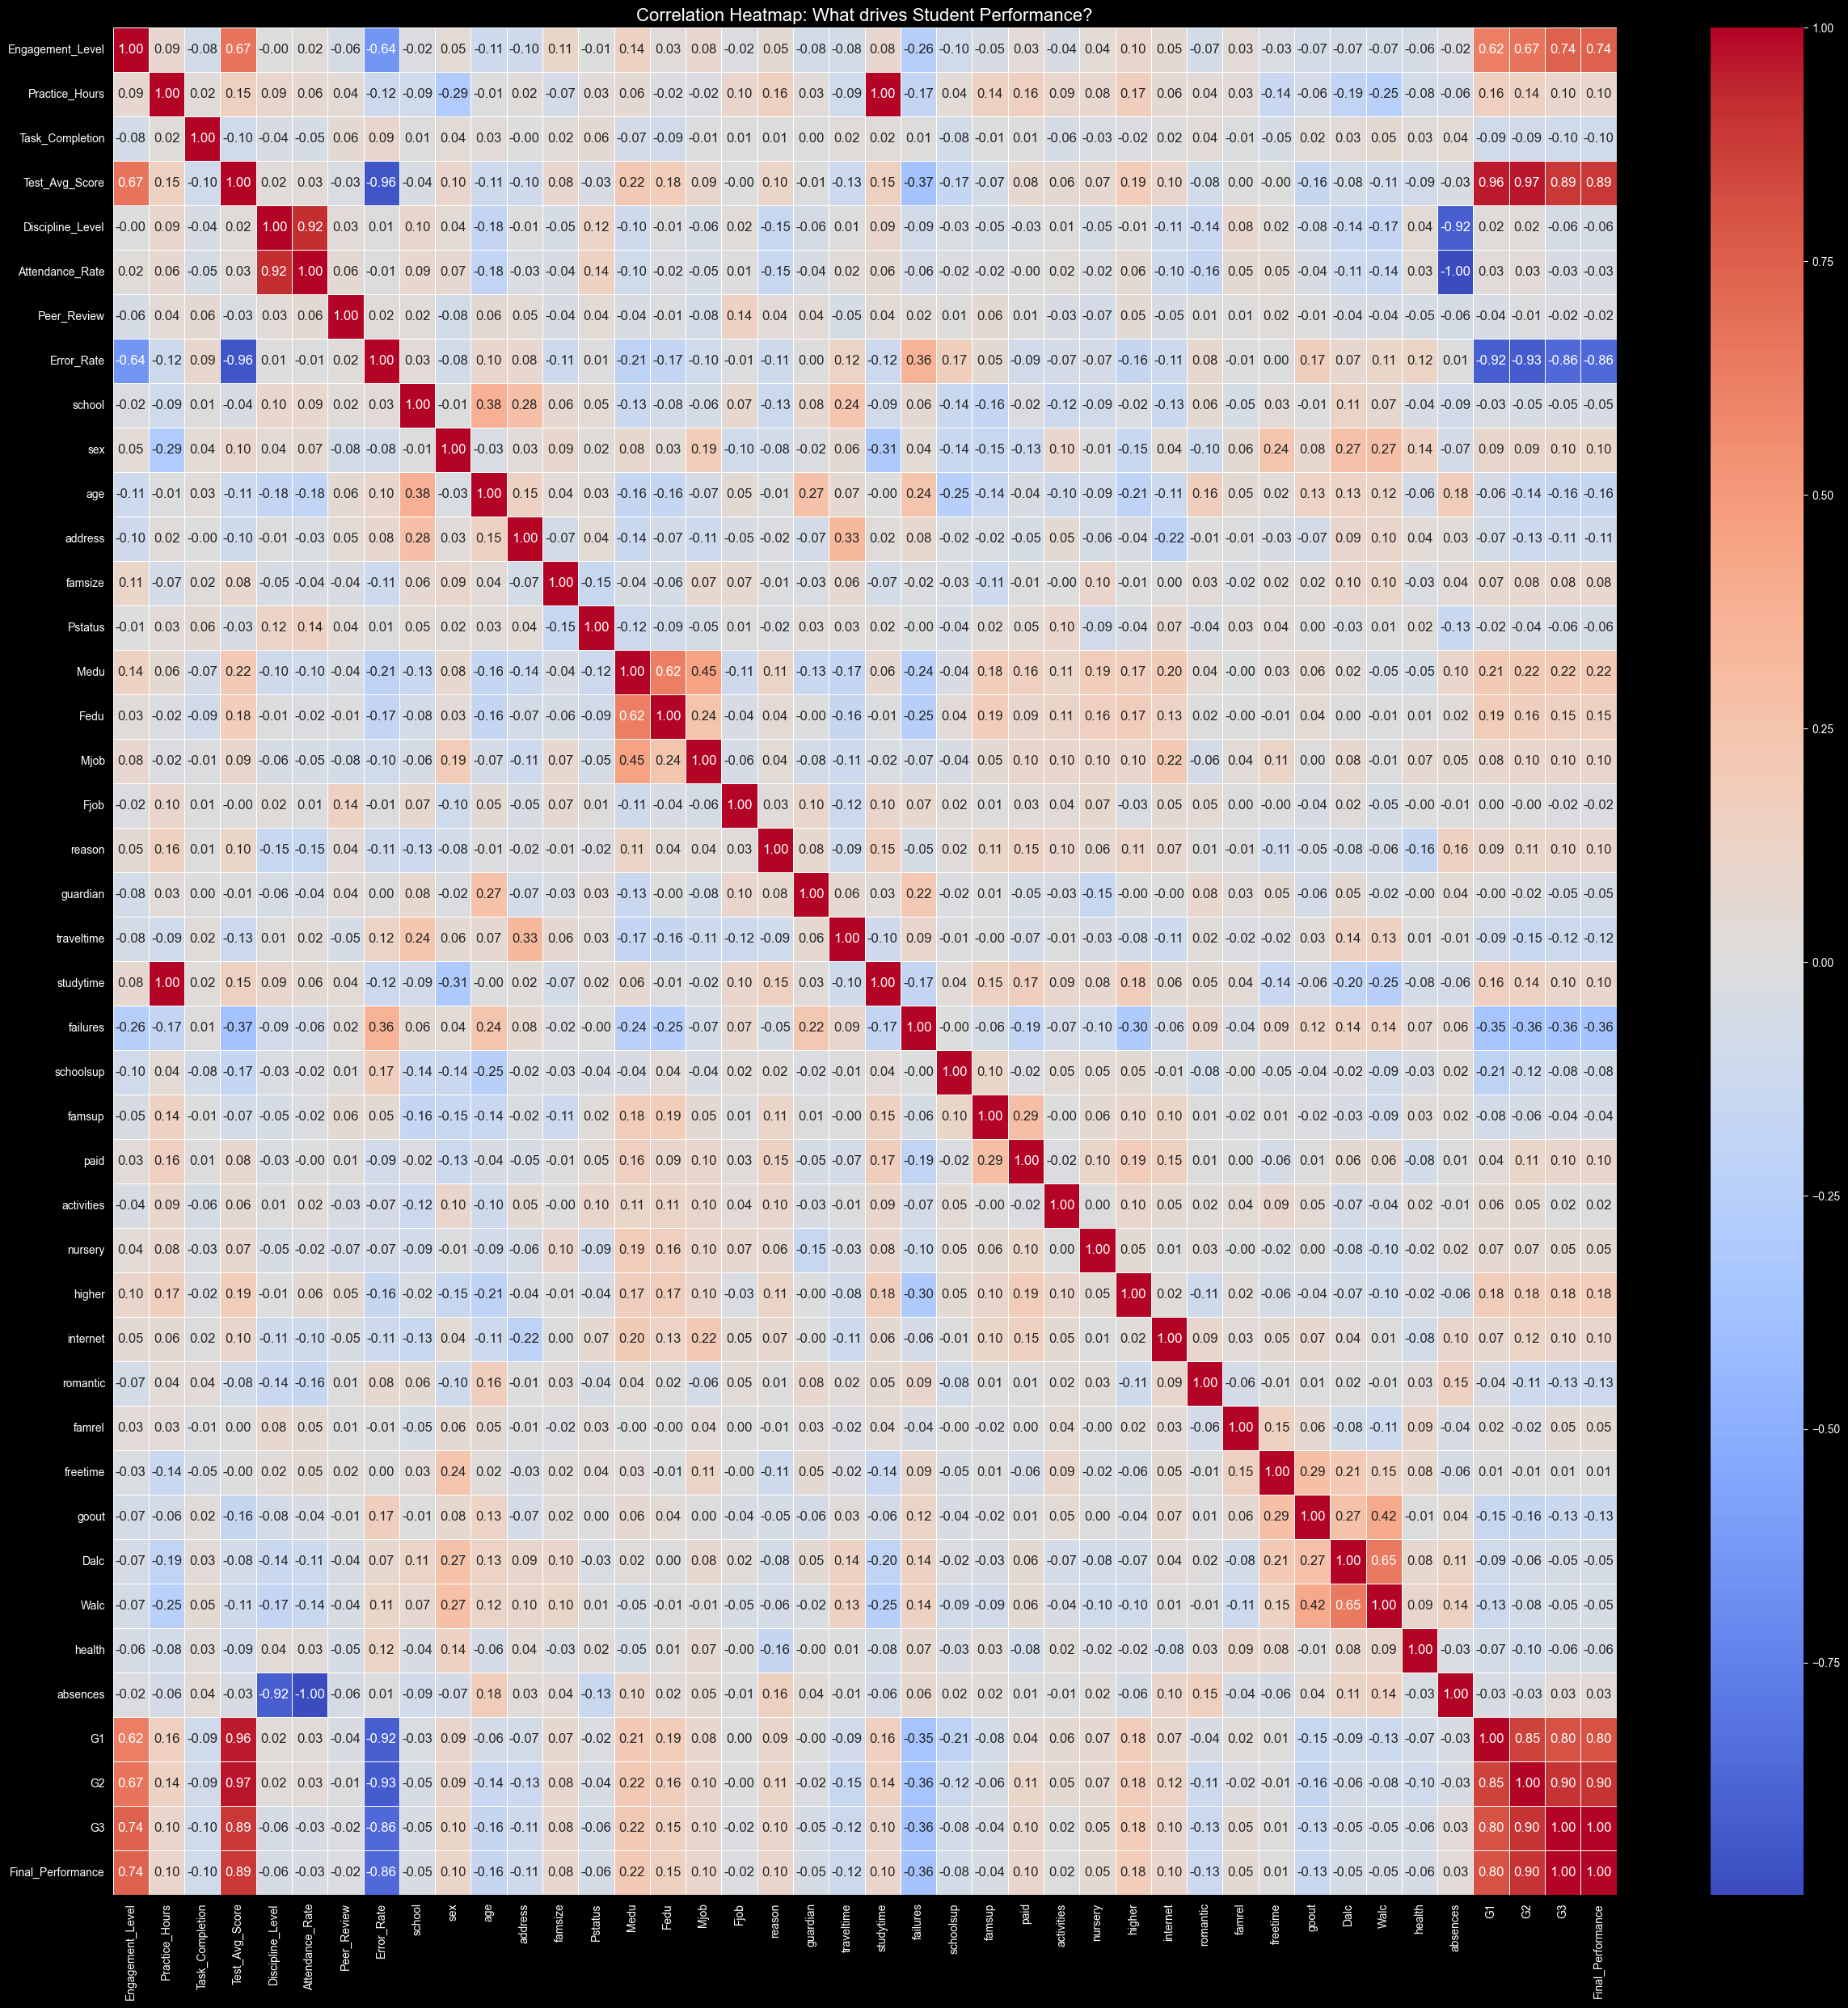

In [1441]:
# importing all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# Configuring Logging
logging.basicConfig(
    filename="model.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
console = logging.StreamHandler()
console.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(message)s')
console.setFormatter(formatter)
logging.getLogger('').addHandler(console)

# 1. Load the Super Dataset to the file.
try:
    df = pd.read_csv('my_full_dataset.csv')
    logging.info("✅ Dataset loaded successfully!")
except FileNotFoundError:
    logging.error("❌ Error: 'my_full_dataset.csv' not found. Make sure you ran the previous step!")
    exit()




# We manually force 'yes' to 1 and 'no' to 0 so that when assigning the values we don't assign 0 to No and 1 to yes
binary_map = {'yes': 1, 'no': 0}

# Mapping the values of the nonnumeric fields to the  numbers so that the model can track them while  doing correlation heatmap.
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        if set(unique_vals).issubset({'yes', 'no', 'Yes', 'No'}):
            print(f"✅ Converting '{col}' to Real Boolean (1/0)...")
            df[col] = df[col].map(binary_map)

for col in df.select_dtypes(include=['object']).columns:
    df[col], _ = pd.factorize(df[col])


# 3. Calculate Correlations between all of them.
corr_matrix = df.corr()
#
# sorts the correlation of the columns with the final  performance by descending order.
target_corr = corr_matrix[['Final_Performance']].sort_values(by='Final_Performance', ascending=False)

print("\n--- 🏆 TOP 5 POSITIVE FACTORS (Boost Grade) ---")
print(target_corr.head(6))

print("\n--- 📉 TOP 5 NEGATIVE FACTORS (Lower Grade) ---")
print(target_corr.tail(5))

# 5. Visualizing: The Heatmap
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,annot_kws={'size': 12},fmt=".2f")
plt.title("Correlation Heatmap: What drives Student Performance?", fontsize=16)
plt.show()

The thing to do
1. Find the most important columns which affect the final_performance the most.  DONE
2. Data  finalisation : Remove all the unnessary columns  from  the dataset.  DONE
3. Data cleaning: Clean the data and check for all the problems  in the data.
    1. Feature scaling to ensure all the features have more or  less same impact and remove the outliers from  the data.

In [1442]:
# made a list of the columns to keep from the dataset based on the correlation with the final performance
keep_columns = [
    'Engagement_Level',
    'Test_Avg_Score',
    'Error_Rate',
    'Final_Performance'
]

df_final = df[keep_columns].copy()
df_final.to_csv('student_performance_final.csv', index=False)
print(f"It contains {df_final.shape[0]} students and {df_final.shape[1]} columns.")


It contains 395 students and 4 columns.


In [1443]:
df_final.describe()

,Engagement_Level,Test_Avg_Score,Error_Rate,Final_Performance
count,395.000000,395.000000,395.000000,395.000000
mean,5.346835,54.056962,0.463342,52.075949
std,2.587300,17.037393,0.179444,22.907213
min,1.000000,10.000000,0.020000,0.000000
25%,4.000000,42.500000,0.340000,40.000000
50%,5.000000,55.000000,0.470000,55.000000
75%,7.000000,65.000000,0.580000,70.000000
max,10.000000,95.000000,1.000000,100.000000


In [1444]:
# dropping the outliers calculated the outliers using the IQR value for the field
df_final = df_final[df_final['Error_Rate'] < .94].reset_index(drop=True)
print(df_final.shape)

(393, 4)


In [1445]:
# Removed  the G1 as the high correlation so removed it.
correlation = df['G1'].corr(df['G2'])
print(f"Correlation G1-G2: {correlation:.3f}")


Correlation G1-G2: 0.852


In [1446]:
df_final.to_csv('student_performance_final.csv', index=False)

In [1447]:
df_final.describe()
from sklearn.preprocessing import StandardScaler

In [1448]:
X = df_final.drop(columns=['Final_Performance'])
Y = df_final['Final_Performance']

In [1449]:
# doing the training,  testing and the cross-validation split
from sklearn.model_selection import train_test_split

X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.40, random_state=42
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.50, random_state=661
)

print(f"Total rows: {len(X)}")
print(f"🏠 Training set (60%):   {len(X_train)} rows")
print(f"🧪 Validation set (20%): {len(X_val)} rows")
print(f"🏁 Testing set (20%):    {len(X_test)} rows")
logging.info(f"✂️ Data Split Complete. Training Set Size: {len(X_train)} students.Testing Set Size: {len(X_test)} students.Cross Validation Set Size: {len(X_val)} students.")


2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.


Total rows: 393
🏠 Training set (60%):   235 rows
🧪 Validation set (20%): 79 rows
🏁 Testing set (20%):    79 rows


2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testing Set Size: 79 students.Cross Validation Set Size: 79 students.
2026-02-13 21:48:27,117 - ✂️ Data Split Complete. Training Set Size: 235 students.Testin

In [1450]:
# scaling the input column values of the dataset so that the all the data has equal weightage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.describe())

       Engagement_Level  Test_Avg_Score    Error_Rate
count      2.350000e+02    2.350000e+02  2.350000e+02
mean      -1.096050e-16   -1.814152e-16  1.133845e-16
std        1.002134e+00    1.002134e+00  1.002134e+00
min       -1.646537e+00   -2.322696e+00 -2.528274e+00
25%       -8.803269e-01   -6.977517e-01 -6.678160e-01
50%       -1.141164e-01    4.085934e-02  4.774464e-02
75%        6.520940e-01    6.317482e-01  7.346828e-01
max        1.801410e+00    2.404415e+00  2.337539e+00


In [1451]:
# training the model
from sklearn.linear_model import Ridge
lr = Ridge(alpha=70,fit_intercept=True)
lr.fit(X_scaled, Y_train)
print("Model is Trained")

Model is Trained


In [1452]:
lr.coef_

array([ 6.23465235,  8.0302664 , -6.28406049])

In [1453]:
lr.intercept_

np.float64(51.48936170212766)

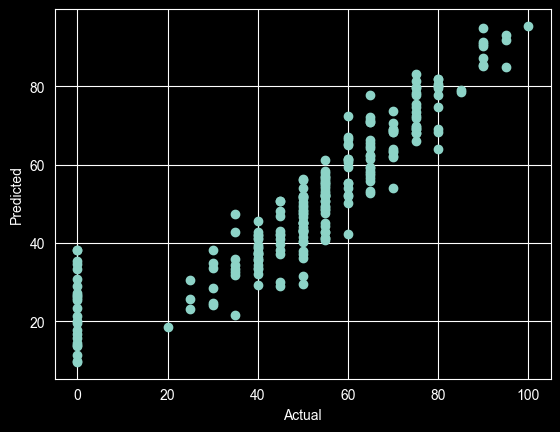

In [1470]:
# plotting the actual v/s predicted value so that seeing how the model is performing
plt.scatter(Y_train,lr.predict(X_scaled))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [1455]:
Y_pred=lr.predict(X_test)

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [1456]:
# calculating the  metrics of the test_data given by the trained  model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
print(score)  #printing the  R2 value
print(mse)
print(mae)


0.8345396173321598
80.99499151888892
6.57032235102851


In [1457]:
# printing the adjusted R2 value
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8279212020254462

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


🏁 FINAL TEST RESULTS 🏁
Final R-squared: 0.8345
Average Error: 6.57 points


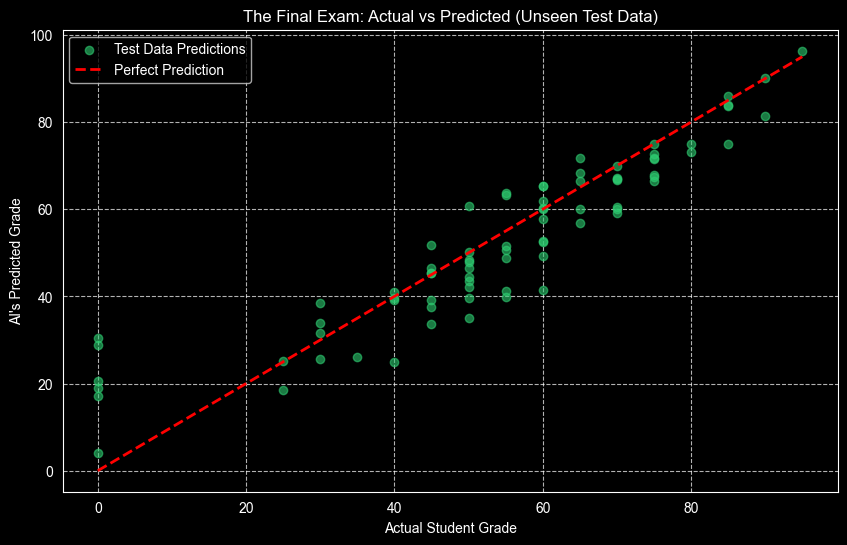

In [1458]:
y_final_pred = lr.predict(X_test)

# 2. CALCULATE FINAL METRICS
final_r2 = r2_score(Y_test, y_final_pred)
final_mae = mean_absolute_error(Y_test, y_final_pred)

print("🏁 FINAL TEST RESULTS 🏁")
print(f"Final R-squared: {final_r2:.4f}")
print(f"Average Error: {final_mae:.2f} points")

# 3. THE FINAL VISUALIZATION
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_final_pred, color='#2ecc71', alpha=0.6, label='Test Data Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.title("The Final Exam: Actual vs Predicted (Unseen Test Data)")
plt.xlabel("Actual Student Grade")
plt.ylabel("AI's Predicted Grade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [1459]:
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()
prediction=lr.predict(X_test)
print(prediction)


[61.89652035 52.72770576 57.74140272 56.77576492 30.53706168 46.52126601
 25.15714059 47.94415605 71.81685583 81.46848932 39.59232379 63.22188825
 96.37046107 18.49040632 50.57581921 71.8103618  72.62734413 39.96808423
 28.84546966 63.81176561 48.31038017 35.06144572 20.6487869  71.56418419
 65.36423848 60.47363031 66.91975364 34.00477981 25.65598984  4.07125347
 59.99081141 51.7780983  65.38676285 33.606495   67.24742304 68.33310736
 60.00684176 90.04093253 52.58858661 50.08650628 66.79666483 51.64851547
 26.12927242 67.5065887  31.5122358  45.31898692 24.92699333 41.13830263
 59.16429276 37.67058451 85.86978456 17.05148594 44.49246827 67.8663188
 39.2325937  75.01587197 45.47109413 40.93372203 49.24395729 48.90025753
 19.06425334 59.97478107 74.87675282 60.36657185 66.55048722 39.12553524
 73.11016303 41.51406307 60.82686638 42.22702924 70.01820535 46.41420755
 38.55473051 66.51842653 83.97056964 43.54286082 83.60434552 74.89927719
 39.73144294]


C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [1460]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Final_Performance   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              2494.
Date:                Fri, 13 Feb 2026   Prob (F-statistic):                   3.58e-176
Time:                        21:48:27   Log-Likelihood:                         -869.78
No. Observations:                 235   AIC:                                      1746.
Df Residuals:                     232   BIC:                                      1756.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Engagement_Level     2.5199      0.327      7.709      0.000       1.876       3.164
Test_Avg_Score       0.8194      0.037     22.059      0.000       0.746       0.893
Error_Rate         -13.7569      2.137     -6.439      0.000     -17.967      -9.547
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.600
Skew:                          -1.232   Prob(JB):                     1.96e-28
Kurtosis:                       5.637   Cond. No.                         190.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1461]:
# testing the model on the cross_validation data and noting the metrics so that to check if the model is performing consistently
Y2_pred = lr.predict(X_val)
mse=mean_squared_error(Y_val,Y2_pred)
mae=mean_absolute_error(Y_val,Y2_pred)
score=r2_score(Y_val,Y2_pred)
print(score)
print(mse)
print(mae)


0.8156315880477968
81.61426240992661
6.4325890373796915


C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [1462]:
# printing the adjusted R2 value
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


0.8082568515697086

In [1465]:
# printing the weight for the model  like for the linear multi field regression the G1  coeff is  giving the  negative cross-relation due  to Multicollinearity with the test_avg score
for name, coef in zip(X_train.columns, lr.coef_):
    print(name, coef)


Engagement_Level 6.234652349145578
Test_Avg_Score 8.030266399924662
Error_Rate -6.284060494498308


In [1466]:
import pickle

In [1467]:
# for  deploying the model
pickle.dump(lr, open('model.pkl', 'wb'))

In [1468]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [1469]:
print("✅ Model and Scaler exported!")

✅ Model and Scaler exported!


In [1488]:
# ============================================================
# 🧪 COMPREHENSIVE TEST CASES FOR ML MODEL
# 20+ realistic student scenarios with valid data ranges
# ============================================================

import pandas as pd
import numpy as np

print("=" * 90)
print("🧪 COMPREHENSIVE MODEL TESTING - 20+ TEST CASES")
print("=" * 90)

# Define comprehensive test cases
test_cases = [
    # ===== CATEGORY 1: EXTREME CASES (Within Valid Ranges) =====
    {
        'category': '🔴 WORST CASE SCENARIO',
        'name': 'Dropout Risk Student',
        'data': {'Engagement_Level': 1, 'Test_Avg_Score': 48, 'Error_Rate': 1},
        'expected': 'Very Low (0-20)'
    },
    {
        'category': '⭐ BEST CASE SCENARIO',
        'name': 'Perfect Student',
        'data': {'Engagement_Level': 10, 'Test_Avg_Score': 95, 'Error_Rate': 0.02},
        'expected': 'Very High (90-100)'
    },

    # ===== CATEGORY 2: BELOW AVERAGE STUDENTS =====
    {
        'category': '🔴 BELOW AVERAGE',
        'name': 'Low Engagement, Struggling',
        'data': {'Engagement_Level': 2, 'Test_Avg_Score': 25, 'Error_Rate': 0.80},
        'expected': 'Low (15-30)'
    },
    {
        'category': '🔴 BELOW AVERAGE',
        'name': 'Very Low Scores',
        'data': {'Engagement_Level': 3, 'Test_Avg_Score': 15, 'Error_Rate': 0.75},
        'expected': 'Low (10-25)'
    },
    {
        'category': '🔴 BELOW AVERAGE',
        'name': 'High Errors Despite Effort',
        'data': {'Engagement_Level': 6, 'Test_Avg_Score': 30, 'Error_Rate': 0.70},
        'expected': 'Low-Medium (25-40)'
    },
    {
        'category': '🔴 BELOW AVERAGE',
        'name': 'Disengaged but Some Knowledge',
        'data': {'Engagement_Level': 3, 'Test_Avg_Score': 40, 'Error_Rate': 0.65},
        'expected': 'Low-Medium (25-40)'
    },

    # ===== CATEGORY 3: AVERAGE STUDENTS =====
    {
        'category': '🟡 AVERAGE',
        'name': 'Balanced Average Student',
        'data': {'Engagement_Level': 5, 'Test_Avg_Score': 50, 'Error_Rate': 0.50},
        'expected': 'Medium (45-60)'
    },
    {
        'category': '🟡 AVERAGE',
        'name': 'Slightly Above Average',
        'data': {'Engagement_Level': 6, 'Test_Avg_Score': 55, 'Error_Rate': 0.45},
        'expected': 'Medium (50-65)'
    },
    {
        'category': '🟡 AVERAGE',
        'name': 'Inconsistent - High Engagement, Average Score',
        'data': {'Engagement_Level': 7, 'Test_Avg_Score': 45, 'Error_Rate': 0.55},
        'expected': 'Medium (50-65)'
    },
    {
        'category': '🟡 AVERAGE',
        'name': 'Hard Worker, Moderate Results',
        'data': {'Engagement_Level': 7, 'Test_Avg_Score': 50, 'Error_Rate': 0.50},
        'expected': 'Medium (55-70)'
    },
    {
        'category': '🟡 AVERAGE',
        'name': 'Mediocre Across the Board',
        'data': {'Engagement_Level': 5, 'Test_Avg_Score': 48, 'Error_Rate': 0.52},
        'expected': 'Medium (45-60)'
    },

    # ===== CATEGORY 4: GOOD STUDENTS =====
    {
        'category': '🟢 GOOD',
        'name': 'Strong Performer',
        'data': {'Engagement_Level': 8, 'Test_Avg_Score': 70, 'Error_Rate': 0.30},
        'expected': 'High (70-80)'
    },
    {
        'category': '🟢 GOOD',
        'name': 'Excellent Test Scores',
        'data': {'Engagement_Level': 7, 'Test_Avg_Score': 80, 'Error_Rate': 0.25},
        'expected': 'High (75-85)'
    },
    {
        'category': '🟢 GOOD',
        'name': 'Highly Engaged Learner',
        'data': {'Engagement_Level': 9, 'Test_Avg_Score': 65, 'Error_Rate': 0.35},
        'expected': 'High (75-85)'
    },
    {
        'category': '🟢 GOOD',
        'name': 'Consistent Achiever',
        'data': {'Engagement_Level': 8, 'Test_Avg_Score': 75, 'Error_Rate': 0.25},
        'expected': 'High (75-85)'
    },
    {
        'category': '🟢 GOOD',
        'name': 'Above Average All Around',
        'data': {'Engagement_Level': 7, 'Test_Avg_Score': 68, 'Error_Rate': 0.35},
        'expected': 'High (68-78)'
    },

    # ===== CATEGORY 5: EXCELLENT STUDENTS =====
    {
        'category': '⭐ EXCELLENT',
        'name': 'Top Performer',
        'data': {'Engagement_Level': 9, 'Test_Avg_Score': 85, 'Error_Rate': 0.15},
        'expected': 'Very High (85-95)'
    },
    {
        'category': '⭐ EXCELLENT',
        'name': 'Exceptional Student',
        'data': {'Engagement_Level': 10, 'Test_Avg_Score': 88, 'Error_Rate': 0.10},
        'expected': 'Very High (90-100)'
    },
    {
        'category': '⭐ EXCELLENT',
        'name': 'High Achiever with Low Errors',
        'data': {'Engagement_Level': 9, 'Test_Avg_Score': 82, 'Error_Rate': 0.12},
        'expected': 'Very High (85-95)'
    },

    # ===== CATEGORY 6: EDGE CASES (Still Valid) =====
    {
        'category': '🔍 EDGE CASE',
        'name': 'High Engagement, Low Scores',
        'data': {'Engagement_Level': 9, 'Test_Avg_Score': 28, 'Error_Rate': 0.72},
        'expected': 'Low-Medium (30-45) - Hard worker but struggling'
    },
    {
        'category': '🔍 EDGE CASE',
        'name': 'Low Engagement, High Scores',
        'data': {'Engagement_Level': 2, 'Test_Avg_Score': 78, 'Error_Rate': 0.22},
        'expected': 'Medium (45-60) - Natural talent, coasting'
    },
    {
        'category': '🔍 EDGE CASE',
        'name': 'Balanced Minimum',
        'data': {'Engagement_Level': 1, 'Test_Avg_Score': 50, 'Error_Rate': 0.50},
        'expected': 'Low (25-40)'
    },
    {
        'category': '🔍 EDGE CASE',
        'name': 'Balanced Maximum',
        'data': {'Engagement_Level': 10, 'Test_Avg_Score': 50, 'Error_Rate': 0.50},
        'expected': 'High (65-80)'
    },
]

# ============================================================
# RUN ALL TESTS
# ============================================================

results = []
current_category = None

for i, test_case in enumerate(test_cases, 1):
    # Print category header
    if test_case['category'] != current_category:
        current_category = test_case['category']
        print(f"\n{'=' * 90}")
        print(f"{current_category}")
        print(f"{'=' * 90}")

    # Create DataFrame
    new_student_data = test_case['data']
    new_student_df = pd.DataFrame([new_student_data])
    new_student_df = new_student_df[X_train.columns]

    # Scale
    scaled_input = scaler.transform(new_student_df)
    new_student_scaled_df = pd.DataFrame(scaled_input, columns=X_train.columns)

    # Predict
    predicted_grade = lr.predict(new_student_scaled_df)[0]

    # Store result
    results.append({
        'test_num': i,
        'name': test_case['name'],
        'engagement': new_student_data['Engagement_Level'],
        'test_score': new_student_data['Test_Avg_Score'],
        'error_rate': new_student_data['Error_Rate'],
        'prediction': predicted_grade,
        'expected': test_case['expected']
    })

    # Display result
    print(f"\nTest #{i}: {test_case['name']}")
    print(f"  📊 Input Values:")
    print(f"     • Engagement Level: {new_student_data['Engagement_Level']}/10")
    print(f"     • Test Avg Score:   {new_student_data['Test_Avg_Score']}/95")
    print(f"     • Error Rate:       {new_student_data['Error_Rate']:.2f}")
    print(f"  ✅ PREDICTED FINAL GRADE: {predicted_grade:.2f} / 100")
    print(f"  💭 Expected Range: {test_case['expected']}")

    # Color-coded interpretation
    if predicted_grade < 25:
        status = "🔴 CRITICAL - Student at risk"
    elif predicted_grade < 40:
        status = "🔴 FAIL - Needs immediate help"
    elif predicted_grade < 55:
        status = "🟡 BELOW AVG - Needs improvement"
    elif predicted_grade < 70:
        status = "🟢 AVERAGE - Acceptable"
    elif predicted_grade < 82:
        status = "🟢 GOOD - Strong performance"
    else:
        status = "⭐ EXCELLENT - Outstanding!"

    print(f"  Status: {status}")

# ============================================================
# SUMMARY STATISTICS
# ============================================================

print(f"\n\n{'=' * 90}")
print("📈 SUMMARY STATISTICS")
print(f"{'=' * 90}\n")

results_df = pd.DataFrame(results)

print(f"Total Tests Run: {len(results_df)}")
print(f"\nPrediction Statistics:")
print(f"  Minimum Predicted Grade: {results_df['prediction'].min():.2f}")
print(f"  Maximum Predicted Grade: {results_df['prediction'].max():.2f}")
print(f"  Average Predicted Grade: {results_df['prediction'].mean():.2f}")
print(f"  Median Predicted Grade:  {results_df['prediction'].median():.2f}")
print(f"  Std Deviation:           {results_df['prediction'].std():.2f}")

print(f"\nGrade Distribution:")
fail_count = len(results_df[results_df['prediction'] < 40])
below_avg = len(results_df[(results_df['prediction'] >= 40) & (results_df['prediction'] < 60)])
average = len(results_df[(results_df['prediction'] >= 60) & (results_df['prediction'] < 75)])
good = len(results_df[(results_df['prediction'] >= 75) & (results_df['prediction'] < 85)])
excellent = len(results_df[results_df['prediction'] >= 85])

print(f"  🔴 Below 40 (Failing):     {fail_count} students")
print(f"  🟡 40-60 (Below Avg):      {below_avg} students")
print(f"  🟢 60-75 (Average-Good):   {average} students")
print(f"  🟢 75-85 (Good):           {good} students")
print(f"  ⭐ 85+ (Excellent):        {excellent} students")

# ============================================================
# CORRELATION ANALYSIS
# ============================================================

print(f"\n\n{'=' * 90}")
print("🔬 CORRELATION WITH PREDICTION")
print(f"{'=' * 90}\n")

print(f"Engagement Level vs Prediction:  r = {results_df['engagement'].corr(results_df['prediction']):.3f}")
print(f"Test Score vs Prediction:        r = {results_df['test_score'].corr(results_df['prediction']):.3f}")
print(f"Error Rate vs Prediction:        r = {results_df['error_rate'].corr(results_df['prediction']):.3f}")

print(f"\n💡 Interpretation:")
print(f"  • Positive correlation = Feature helps prediction")
print(f"  • Negative correlation = Feature hurts prediction")
print(f"  • Closer to ±1 = Stronger relationship")

# ============================================================
# DATA EXPORT
# ============================================================

results_df.to_csv('test_results.csv', index=False)
print(f"\n✅ Test results saved to 'test_results.csv'")

🧪 COMPREHENSIVE MODEL TESTING - 20+ TEST CASES

🔴 WORST CASE SCENARIO

Test #1: Dropout Risk Student
  📊 Input Values:
     • Engagement Level: 1/10
     • Test Avg Score:   48/95
     • Error Rate:       1.00
  ✅ PREDICTED FINAL GRADE: 18.86 / 100
  💭 Expected Range: Very Low (0-20)
  Status: 🔴 CRITICAL - Student at risk

⭐ BEST CASE SCENARIO

Test #2: Perfect Student
  📊 Input Values:
     • Engagement Level: 10/10
     • Test Avg Score:   95/95
     • Error Rate:       0.02
  ✅ PREDICTED FINAL GRADE: 97.92 / 100
  💭 Expected Range: Very High (90-100)
  Status: ⭐ EXCELLENT - Outstanding!

🔴 BELOW AVERAGE

Test #3: Low Engagement, Struggling
  📊 Input Values:
     • Engagement Level: 2/10
     • Test Avg Score:   25/95
     • Error Rate:       0.80
  ✅ PREDICTED FINAL GRADE: 17.53 / 100
  💭 Expected Range: Low (15-30)
  Status: 🔴 CRITICAL - Student at risk

Test #4: Very Low Scores
  📊 Input Values:
     • Engagement Level: 3/10
     • Test Avg Score:   15/95
     • Error Rate:       